In [ ]:
#To identisy Data insites with following steps 
#problem definition
#spliting training and testing data
#Data Wrangle, Data prepare, data cleanse etc
#Analyze, identify patterns, and explore the data
#Visualize, report, and present ,identify problem solving steps!

In [1]:
download_url="https://github.com/krishnavizster/storessalesdata/blob/main/Stores%20_Sales_Prediction_data.zip"

In [2]:
import os

In [3]:
os.path.basename(download_url)

'Stores%20_Sales_Prediction_data.zip'

In [21]:
!pip install seaborn

     ------------------------------------ 292.8/292.8 kB 296.5 kB/s eta 0:00:00
     ---------------------------------------- 7.2/7.2 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 54.9/54.9 kB 286.2 kB/s eta 0:00:00
     -------------------------------------- 944.1/944.1 kB 7.5 MB/s eta 0:00:00
  Using cached Pillow-9.2.0-cp37-cp37m-win_amd64.whl (3.3 MB)


In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
# Ignore Warnings
import warnings 
warnings.filterwarnings('ignore')

In [5]:
import zipfile
with zipfile.ZipFile(download_url, 'r') as zip_ref:
    zip_ref.extractall(raw_data_dir )

OSError: [Errno 22] Invalid argument: 'https://github.com/krishnavizster/storessalesdata/blob/main/Stores%20_Sales_Prediction_data.zip'

In [12]:
sales_data_train=pd.read_csv(r"D:\DS-Projects\INTERNSHIP PROJECT\ML-SALES AND MARKERTING -Stores Sales Prediction PROJECT\DATA FILES\Train.csv")

In [13]:
sales_data_train.shape

(8523, 12)

In [14]:
sales_data_test=pd.read_csv(r"D:\DS-Projects\INTERNSHIP PROJECT\ML-SALES AND MARKERTING -Stores Sales Prediction PROJECT\DATA FILES\Test.csv")

In [15]:
sales_data_test.shape

(5681, 11)

In [16]:
sales_data_train.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
sales_data_test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [19]:
sales_data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [18]:
sales_data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [24]:
#Which features are categorical?
sales_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [23]:
#Which features are categorical?
sales_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [25]:
sales_data_test.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

In [26]:
sales_data_train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [35]:
def categorical(dataframe):
    categorical_features=[feature for feature in dataframe.columns if dataframe[feature].dtypes == 'O']
    print("No. of Categorical feature : ",len(categorical_features))
    print(categorical_features)

In [36]:
categorical(sales_data_train)

No. of Categorical feature :  7
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [37]:
categorical(sales_data_test)

No. of Categorical feature :  7
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [ ]:
#Which features are numerical?
"""need to figure out Within numerical features are the values discrete, 
continuous, or timeseries based? Among other things this helps us select 
the appropriate plots for visualization."""

In [41]:
def numerical(dataframe):
    numerical_features=[feature for feature in dataframe.columns if dataframe[feature].dtypes != 'O']
    print("No. of Numerical feature : ",len(numerical_features),"\n")
    discrete_features=[feature for feature in numerical_features if dataframe[feature].nunique() <25 ]
    continous_features=[feature for feature in numerical_features if feature not in discrete_features]
    print("No. of Discrete feature : ",len(discrete_features))
    print(discrete_features,'\n')
    print("No. of Continous feature : ",len(continous_features))
    print(continous_features)

In [42]:
numerical(sales_data_train)

No. of Numerical feature :  5 

No. of Discrete feature :  1
['Outlet_Establishment_Year'] 

No. of Continous feature :  4
['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [43]:
numerical(sales_data_test)

No. of Numerical feature :  4 

No. of Discrete feature :  1
['Outlet_Establishment_Year'] 

No. of Continous feature :  3
['Item_Weight', 'Item_Visibility', 'Item_MRP']


In [44]:
#statistical analysis 
def desc_numerical(dataframe):
    return dataframe.describe()
def desc_categorical(dataframe):
    return dataframe.describe(include='O')

In [45]:
desc_numerical(sales_data_train)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [46]:
desc_categorical(sales_data_train)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [47]:
desc_numerical(sales_data_test)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [48]:
desc_categorical(sales_data_test)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,5681,5681,5681,4075,5681,5681
unique,1543,5,16,10,3,3,4
top,FDK57,Low Fat,Snack Foods,OUT027,Medium,Tier 3,Supermarket Type1
freq,8,3396,789,624,1862,2233,3717


In [49]:
#Dropping the identifiers
sales_data_train.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
sales_data_test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [70]:

#Identification of blank, null or empty values
def null_values(dataframe):
    return dataframe.isnull().sum()
def nul_map(dataframe):

    plt.figure(figsize=(12,12))
    sns.heatmap(dataframe.isnull(),cmap='viridis',yticklabels=False,cbar=False)
    


In [ ]:
"""xticklabels, yticklabels“auto”, bool, list-like, or int, optional ,
If True, plot the column names of the dataframe. If False, don’t plot the column names."""

In [71]:
null_values(sales_data_train)

Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
"""As clearly seen, the data variable ‘Item_Weight’ contains 1463 and 
'Outlet_Size'contains 2410 missing values out of 8523 records."""

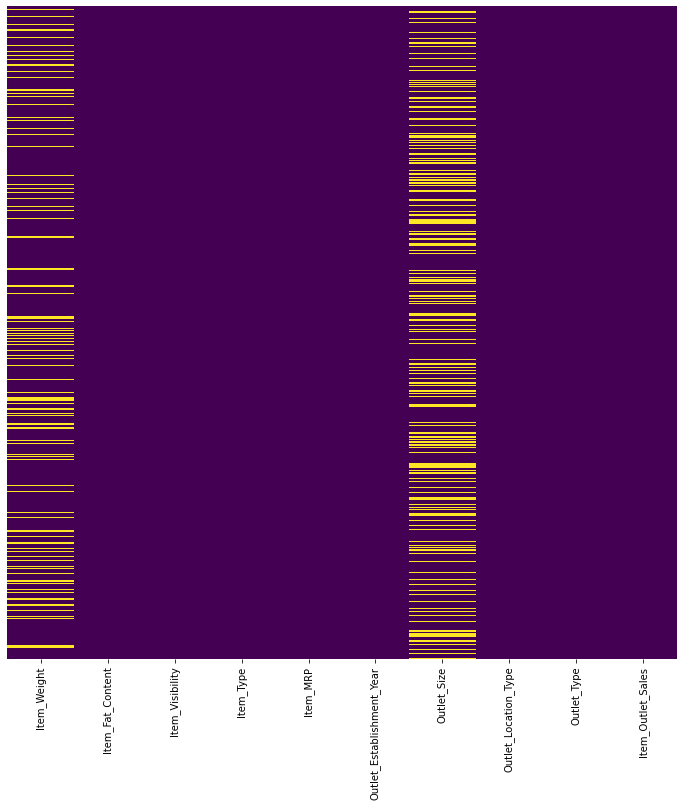

In [72]:
nul_map(sales_data_train)

In [73]:
null_values(sales_data_test)

Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [ ]:
"""As clearly seen, the data variable ‘Item_Weight’ contains 976 and 
'Outlet_Size'contains 1606 missing values out of 8523 records."""

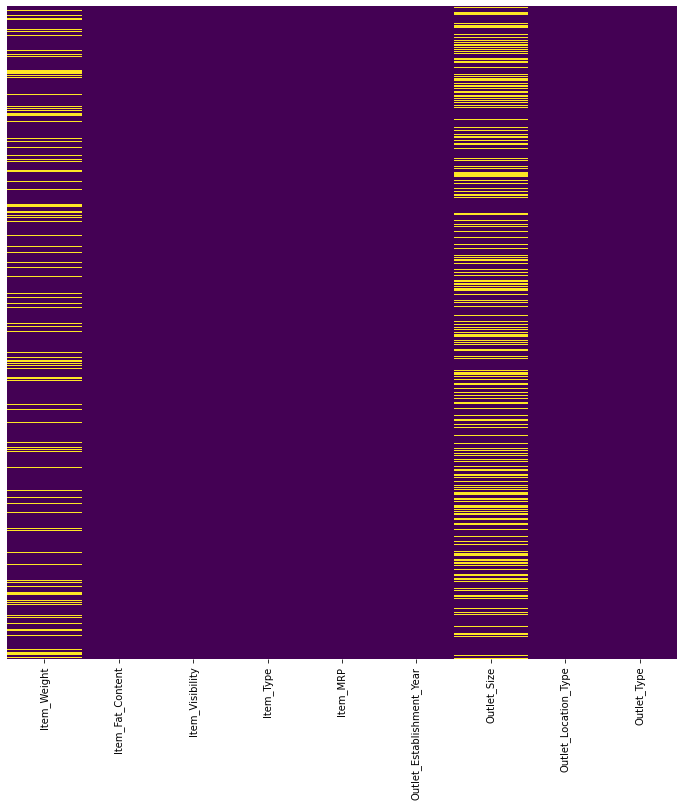

In [74]:
nul_map(sales_data_test)

d:\Storessalesproject\abcd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Item_Weight'>

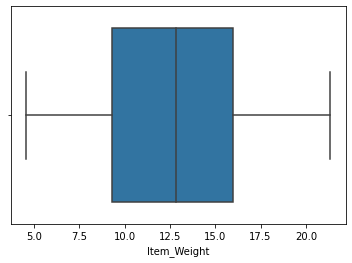

In [90]:
#Missing Values Handling
sns.boxplot('Item_Weight', data = sales_data_train)

In [ ]:
"""Number of Outlier in the column is 0
"""

d:\Storessalesproject\abcd\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Item_Weight'>

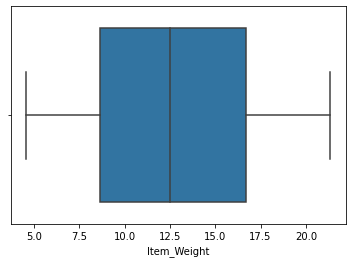

In [91]:
#Missing Values Handling
sns.boxplot('Item_Weight', data = sales_data_test  )

In [ ]:
"""Number of Outlier in the column is 0
"""

In [95]:
#Impute the missing values
def impute_value(dataframe):
    print("Mean = ",dataframe["Item_Weight"].mean(),"; Median = ",dataframe["Item_Weight"].median(),"; Mode = ",dataframe["Item_Weight"].mode()[0])

In [96]:
impute_value(sales_data_train)

Mean =  12.857645184135976 ; Median =  12.857645184135976 ; Mode =  12.857645184135976


In [97]:
impute_value(sales_data_test)

Mean =  12.695633368756642 ; Median =  12.5 ; Mode =  10.5


In [ ]:
#Impute the missing values
"""sinnce the values are contineous values i choose to impute with mean value"""
#Using the mean() method on all the null values

In [99]:
sales_data_train['Item_Weight']= sales_data_train['Item_Weight'].fillna(sales_data_train['Item_Weight'].mean())
sales_data_test['Item_Weight']= sales_data_test['Item_Weight'].fillna(sales_data_test['Item_Weight'].mean())

In [100]:
sales_data_train['Outlet_Size']= sales_data_train['Outlet_Size'].fillna('mean')
sales_data_test['Outlet_Size']= sales_data_test['Outlet_Size'].fillna("mean")

In [101]:
#corss check null values 
null_values(sales_data_train)

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [102]:
null_values(sales_data_test)

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [103]:
#Cleaning the Data
sales_data_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,mean,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [104]:
sales_data_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [107]:
sales_data_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [105]:
sales_data_test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [108]:
sales_data_test["Item_Type"].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

In [ ]:
sales_data_train["Item_Fat_Content"]=np.where((sales_data_train["Item_Fat_Content"] == 'Low Fat')|(sales_data_train["Item_Fat_Content"] == 'LF')|(sales_data_train["Item_Fat_Content"] == 'low fat'),"Low Fat","Regular")
sales_data_train['Outlet_Age']=(2021-sales_data_train['Outlet_Establishment_Year']).astype('str')

In [ ]:
#Explaratory Data Analysis
